In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as sm  


In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


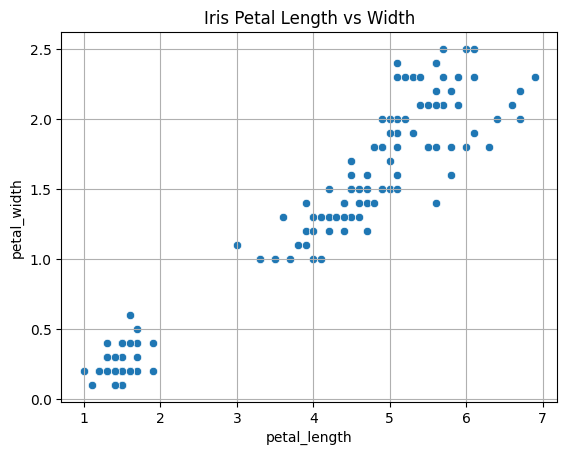

In [5]:
sns.scatterplot(data =df, x = 'petal_length', y = 'petal_width')
plt.title('Iris Petal Length vs Width')
plt.grid()
plt.show()
plt.close()

We can See a Strong Linearity in the figure

<Axes: xlabel='petal_length', ylabel='petal_width'>

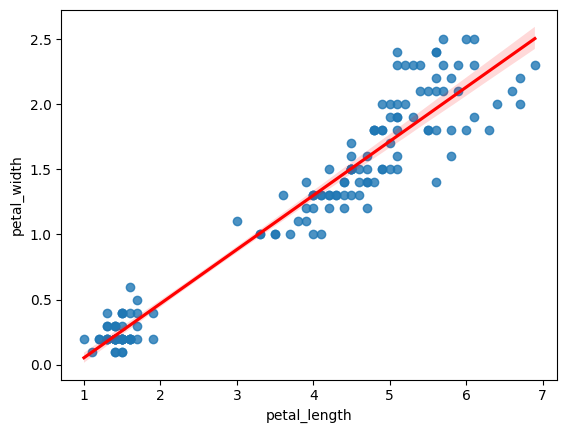

In [6]:
sns.regplot(data =df, x = 'petal_length', y = 'petal_width', line_kws={"color":"r"})

In [7]:
#Building a simple linear regression model

X = df[['petal_length']]
y = df['petal_width']

In [8]:
model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
y_pred = model.predict(X)

df['Error'] = y - y_pred

Coefficient: 0.41575541635241153
Intercept: -0.3630755213190291


<Axes: xlabel='petal_length', ylabel='Error'>

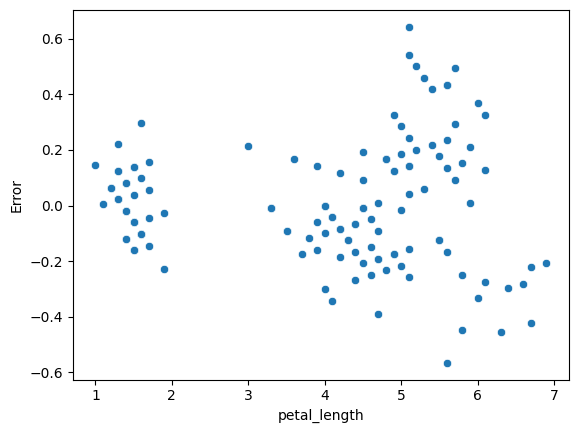

In [9]:
#Error Analysis
sns.scatterplot(data =df, x = 'petal_length', y = 'Error')
# There is no pattern in the error term which means our model is Valid

In [10]:
new_df = df.copy()
new_df.rename(columns={'petal_width':'Y', 'petal_length':'X'}, inplace=True)
result = sm.ols(formula='Y ~ X', data=new_df).fit()